# Примеры к лекции 1. Классификация сигналов: аналоговые, дискретные и цифровые сигналы.
Лекции по курсу "Дискретные преобразования сигналов", 3 курс ФРКТ МФТИ 

In [27]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot
import scipy.io.wavfile # импорт модуля scipy.io.wavfile
from scipy import signal
from IPython.display import Audio

In [28]:
# Если используете Jupyter, то можно поменять backend matplotlib на notebook
%matplotlib notebook
# Для использования backend matplotlib inline, раскомментируйте строку ниже.
# %matplotlib inline

## Дискретизация и квантование в WAV-файлах


* Аналоговый сигнал - звуковая волна, фиксируемая микрофотном. 
* Цифровой сигнал - набор отсчетов, взятых с шагом $\Delta t = 1/f_д$ и квантованных по $2^n$ уровням,  в памяти компьютера.

In [29]:
file_name='tuning-fork.wav'
Audio(file_name)

In [32]:
fs, x = scipy.io.wavfile.read(file_name) # чтение аудиофайла 
k_min, k_max = 8000, 10000
x1=x[k_min:k_max]                     # выбор наблюдаемого диапазона
k=np.arange(x1.size)               # отсчеты по времени

In [33]:
fs     # частота дискретизации в Гц

44100

In [35]:
1/fs # шаг дискретизации в секундах

2.2675736961451248e-05

In [37]:
x      # массив значений x[k]

array([ 0,  0, -1, ..., -3,  2, -1], dtype=int16)

$n=16$ - число бит на храненние каждого отсчета, глубина звука

In [40]:
2**16 # Число уровней квантования

65536

<IPython.core.display.Javascript object>


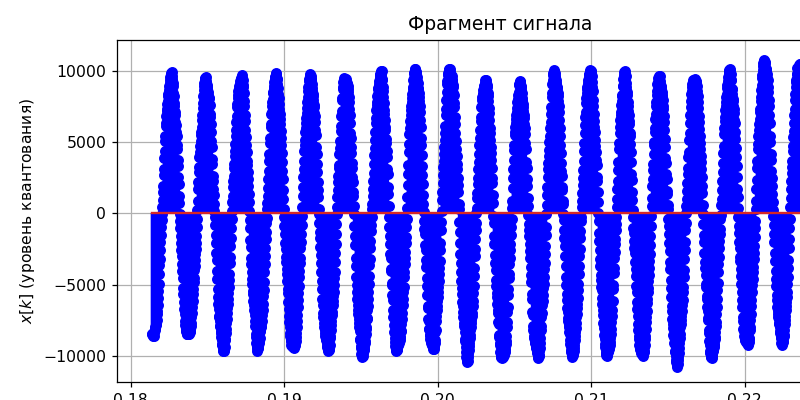

In [42]:
# Построение графиков 
plt.figure(figsize=[8, 4])         # создание полотна размером шириной 8 X 4 дюйма
plt.title("Фрагмент сигнала")
plt.stem((k+k_min)/fs, x1, 'b.-')           # построение графика цифрового сигнала точками точками
plt.grid()                             
plt.xlabel("$t$, c")                      
plt.ylabel("$x[k]$ (уровень квантования)")             
plt.tight_layout()
plt.show()

## Квантование изображения

In [43]:
import pywt # PyWavelets - Wavelet Transforms in Python
original = pywt.data.camera()

In [44]:
original

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8)

In [46]:
np.max(original), np.min(original)

(255, 0)

8-битное изображение (256 уровней)

<IPython.core.display.Javascript object>


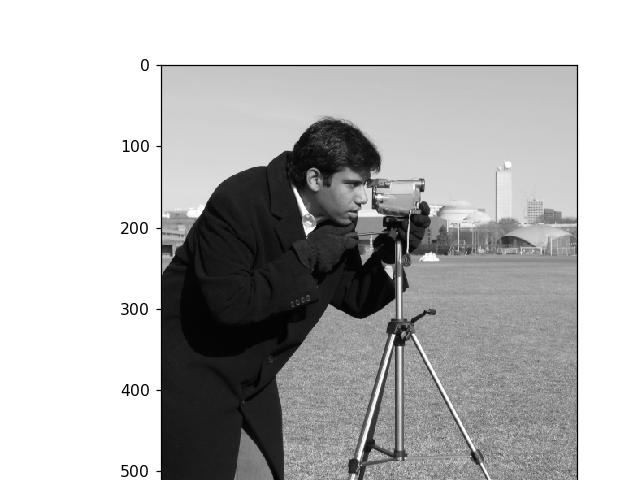

In [47]:
plt.figure()
plt.imshow(original, interpolation="nearest", cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


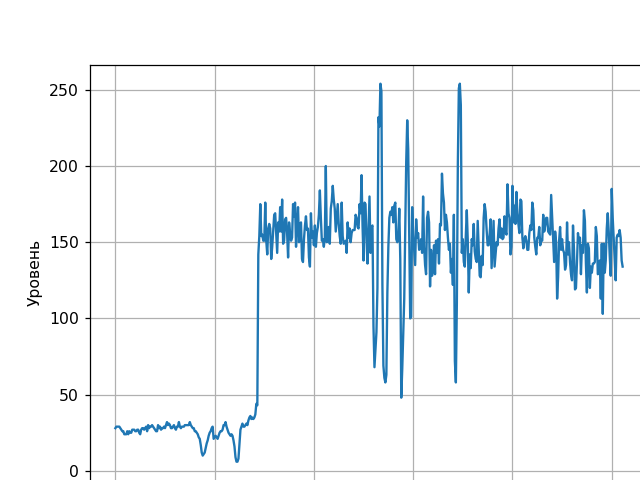

In [14]:
plt.figure()
plt.plot(original[400])
plt.xlabel("Номер пикселя")                      
plt.ylabel("Уровень")   
plt.grid()

<IPython.core.display.Javascript object>


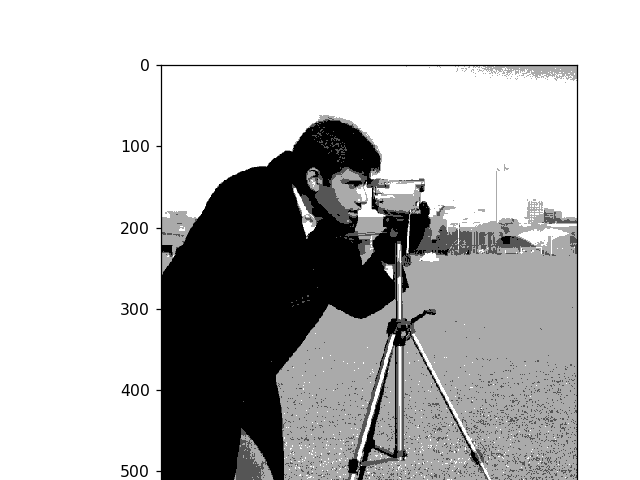

Число уровней квантования  4


In [48]:
L=64
edited=np.floor(original/L)
plt.figure()
plt.imshow(edited, interpolation="nearest", cmap=plt.cm.gray)
plt.show()
print("Число уровней квантования ", int(256/L))

<IPython.core.display.Javascript object>


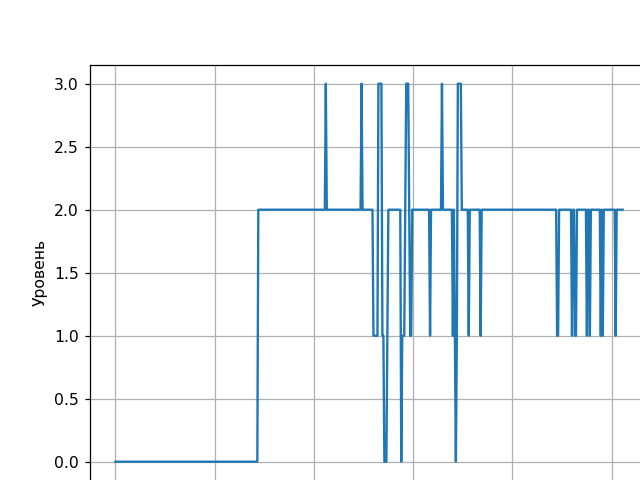

In [49]:
plt.figure()
plt.plot(edited[400])
plt.xlabel("Номер пикселя")                      
plt.ylabel("Уровень")   
plt.grid()

<IPython.core.display.Javascript object>


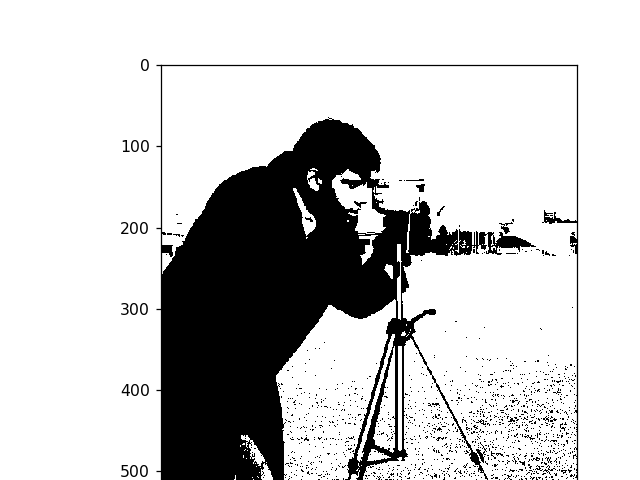

Число уровней квантования  2


In [50]:
L=128
edited=np.floor(original/L)
plt.figure()
plt.imshow(edited, interpolation="nearest", cmap=plt.cm.gray)
plt.show()
print("Число уровней квантования ", int(256/L))

<IPython.core.display.Javascript object>


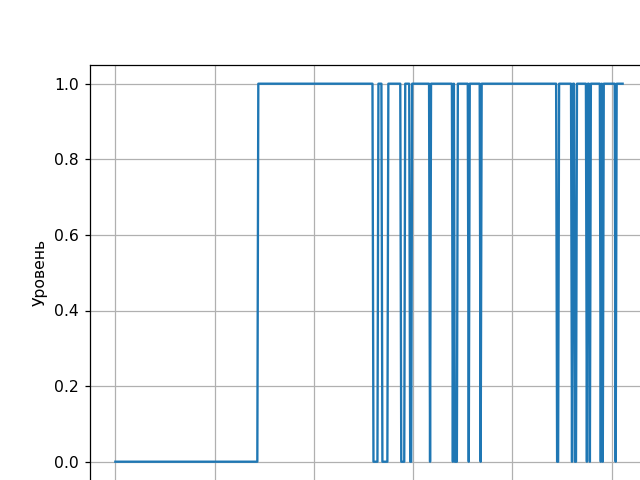

In [51]:
plt.figure()
plt.plot(edited[400])
plt.xlabel("Номер пикселя")                      
plt.ylabel("Уровень")   
plt.grid()

## Анализ электрических сигналов цифровым осциллографом

* Аналоговый сигнал - разность потенциалов между точками электрической схемы. 
* Цифровой сигнал - набор отсчетов, взятых с шагом $\Delta t = 1/f_д$ и квантованных по $2^n$ уровням,  в буфероной памяти.

Рассматрим запись сигнала с осциллографа с 8-битным АЦП.

In [60]:
2**8 # Число уровней квантования

256

In [61]:
file_txt="a5.txt"
f = open(file_txt)
file_text = f.read()
f.closed
print(file_text)

Oscilloscope data. 
Time step = 10,00 uS
Voltage step = 31,25 mV
Zero level = 138

N 	Smpl.	Trig

0	85	0
1	86	0
2	86	0
3	87	0
4	87	0
5	87	0
6	87	0
7	88	0
8	89	0
9	90	0
10	90	0
11	90	0
12	91	0
13	91	0
14	92	0
15	92	0
16	93	0
17	93	0
18	93	0
19	95	0
20	94	0
21	95	0
22	95	0
23	95	0
24	96	0
25	97	0
26	98	0
27	99	0
28	98	0
29	99	0
30	99	0
31	100	0
32	101	0
33	102	0
34	101	0
35	102	0
36	103	0
37	104	0
38	104	0
39	105	0
40	105	0
41	106	0
42	106	0
43	107	0
44	107	0
45	108	0
46	109	0
47	109	0
48	110	0
49	111	0
50	111	0
51	112	0
52	112	0
53	113	0
54	113	0
55	114	0
56	115	0
57	115	0
58	115	0
59	117	0
60	117	0
61	117	0
62	119	0
63	119	0
64	120	0
65	120	0
66	121	0
67	121	0
68	123	0
69	123	0
70	124	0
71	125	0
72	125	0
73	125	0
74	126	0
75	127	0
76	127	0
77	128	0
78	129	0
79	130	0
80	130	0
81	131	0
82	131	0
83	132	0
84	133	0
85	134	0
86	134	0
87	135	0
88	135	0
89	136	0
90	137	0
91	138	0
92	138	0
93	138	0
94	139	0
95	140	0
96	141	0
97	141	0
98	141	0
99	142	0
100	143	0
101	143	0
102	144	0
103	145	0
104

Разделим файл на строки

In [62]:
str1=file_text.split('\n')

Считаем из первой строки шаг дискретизации (`Time step`) и опредлим частоту дискретизации. 

In [63]:
dt, unit = str1[1].replace(',', '.').split(' ')[3:5]
dt=float(dt)
if unit=='uS':
    dt*=1e-6
elif unit=='nS':
    dt*=1e-9
elif unit=='mS':
    dt*=1e-3    
fs = int(1.0 / dt)
print("fд =", fs/1e3, "кГц")

fд = 100.0 кГц


Считаем из второй строки шаг квантования (`Voltage step`). 

In [64]:
dv, unit = str1[2].replace(',', '.').split(' ')[3:5]
dv=float(dv)
if unit=='mV':
    dv*=1e-3
print("q =", dv/1e-3, "мВ")

q = 31.25 мВ


Считаем уровень квантования, отвечающий нулю потенциала (`Zero level`).  

In [65]:
zero_level= int(str1[3].split(' ')[3])
print(zero_level)

138


Пересчитаем величины отсчетов в вольтах. 

In [66]:
str_num = len(str1)
signal_lev = np.empty(shape=(str_num-8), dtype=float)
for k, u in enumerate(range(7, str_num-1, 1)):
    data = str1[u].split()
    signal_lev[k]=(int(data[1])-zero_level)*dv

<IPython.core.display.Javascript object>


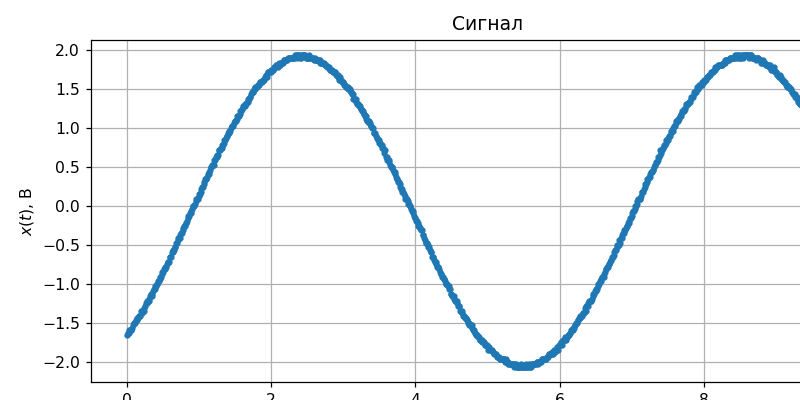

In [67]:
plt.figure(figsize=[8, 4])
plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
plt.title("Сигнал")
plt.xlabel("$t$, мc")
plt.ylabel("$x(t)$, В")
plt.grid()
plt.tight_layout()